In [1]:
import numpy as np
import matplotlib.pylab as plt
import uproot
import awkward as ak
import seaborn
import RA_funcs as RAF

c:\Users\bents\AppData\Local\Programs\Python\Python313\python.exe
import work


<span style="font-family: arial; font-size:25px; color:pink">

Open ROOT file and extract data

In [2]:
# load root file

infile_name = 'TB_FIRE_1101_hits.root'
infile = uproot.open(infile_name)

# get headings

keys = infile.keys()
print(keys)

hits = infile['Hits']
hits.show()

# sort all the characteristics of the run in arrays
tlu = hits['TLU_number'].array()
amp = hits['amplitude'].array()
toa = hits['toa'].array()
time = hits['timestamp'].array()
plane = hits['plane_ID'].array()
channel = hits['ch_ID'].array()


['Hits;1']
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
TLU_number           | uint64_t                 | AsDtype('>u8')
timestamp            | std::vector<uint64_t>    | AsJagged(AsDtype('>u8'), he...
plane_ID             | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...
ch_ID                | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...
amplitude            | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...
toa                  | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...


In [3]:
# create data of paramaters for each hit in the run

tlu_number = -1 # TLU is the event number in the run

# some printing to make sure that the zip works right for the arrays of all runs
# print(("plane:",plane[tlu_number],"ch",channel[tlu_number], " amp",amp[tlu_number]))
# print("######################")
# print("plane:", plane,"ch", channel, "amp", amp)
# print("##################")


hit_data_single_event = ak.zip({"plane":plane[tlu_number],"ch":channel[tlu_number], "amp":amp[tlu_number]})
hit_data = ak.zip({ "plane":plane, "ch":channel, "amp":amp})
# hit_data = ak.zip([amp[10], plane[10], channel[10]])


hit_data_single_event.show()
print("############")
hit_data.show()
type(hit_data)

[{plane: 5, ch: 164, amp: 29},
 {plane: 5, ch: 185, amp: 67}]
############
[[{plane: 0, ch: 128, amp: 39}, {...}, ..., {plane: 7, ch: 164, amp: 155}],
 [{plane: 0, ch: 126, amp: 13}, {...}, ..., {plane: 6, ch: 184, amp: 28}],
 [{plane: 0, ch: 166, amp: 17}, {...}, ..., {plane: 7, ch: 186, amp: 89}],
 [{plane: 0, ch: 164, amp: 87}, {...}, ..., {plane: 7, ch: 184, amp: 130}],
 [{plane: 0, ch: 102, amp: 50}, {...}, ..., {plane: 7, ch: 163, amp: 83}],
 [{plane: 0, ch: 120, amp: 21}, {...}, ..., {plane: 7, ch: 165, amp: 230}],
 [{plane: 0, ch: 105, amp: 52}, {...}, ..., {plane: 7, ch: 145, amp: 168}],
 [{plane: 0, ch: 144, amp: 12}, {...}, ..., {plane: 7, ch: 167, amp: 23}],
 [{plane: 0, ch: 125, amp: 35}, {...}, ..., {plane: 7, ch: 166, amp: 117}],
 [{plane: 0, ch: 87, amp: 17}, {...}, ..., {...}, {plane: 7, ch: 145, amp: 32}],
 ...,
 [{plane: 5, ch: 169, amp: 21}, {...}, ..., {plane: 6, ch: 183, amp: 248}],
 [{plane: 5, ch: 28, amp: 164}, {...}, ..., {plane: 6, ch: 203, amp: 16}],
 [{plan

awkward.highlevel.Array

In [14]:
file_name = "TB_FIRE_1101_hits.root"
hit_data_1101 = RAF.get_ROOT_data_zip(file_name)

Folders: ['Hits;1']

Hits:
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
TLU_number           | uint64_t                 | AsDtype('>u8')
timestamp            | std::vector<uint64_t>    | AsJagged(AsDtype('>u8'), he...
plane_ID             | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...
ch_ID                | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...
amplitude            | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...
toa                  | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...


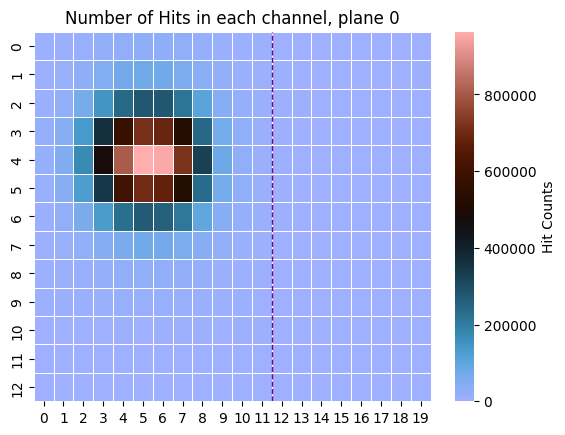

In [11]:
RAF.hits_amount_colormap_single_plane(hit_data_1101, 0)

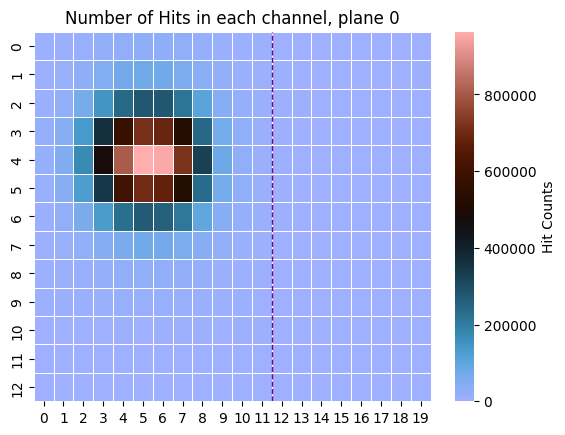

In [12]:
RAF.hits_amount_colormap_single_plane(hit_data_1101, 0)

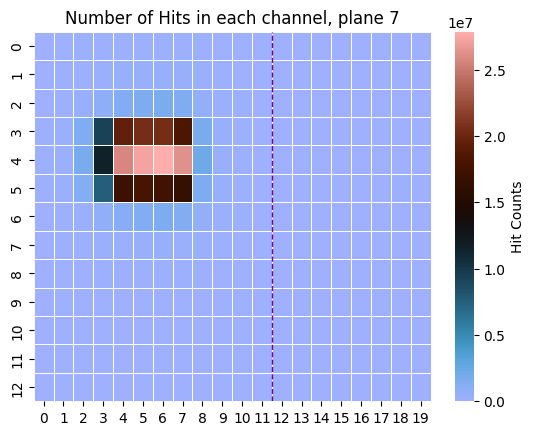

In [13]:
RAF.hits_amp_colormap_single_plane(hit_data_1101, 7)